<a href="https://colab.research.google.com/github/btkcodedev/ml-projects/blob/main/cnn-image-recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Tasks
 - Download the dataset and visualize the images
 - Change the label to one-hot encodings
 - Scale the image pixel values to take between 0 and 1

- CIFAR-10 dataset
  - Images to be recognized: Tiny images of 32 * 32 pixels
  - Labels: 10 possible labels (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck)
  - Dataset size: 60000 images, split into 50000 for training and 10000 for testing

In [1]:
from keras.datasets import cifar10

In [2]:
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print(xtrain.shape, ytrain.shape)
# 50000 images
# 32 pixels in height
# 32 pixels in width
# 3 pixels in depth (corresponding to Red, Green and Blue)

# 50000 images
# 1 label consist of 10 options total

(50000, 32, 32, 3) (50000, 1)


In [4]:
print(xtest.shape, ytest.shape)

(10000, 32, 32, 3) (10000, 1)


In [5]:
xtrain[0] # Machine readable format of image

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 
# %matplotlib inline tells the notebook about wishing for the image to display within the image

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


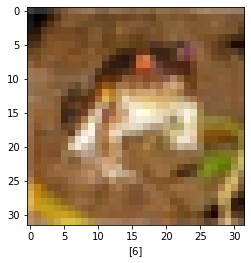

In [7]:
img = plt.imshow(xtrain[0])
plt.xlabel(ytrain[0])
plt.show()

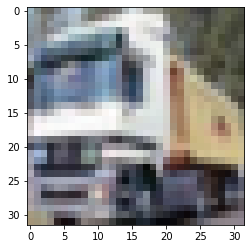

In [8]:
img2 = plt.imshow(xtrain[1])

In [9]:
# Preprocessing of Labels

# Usage of one-hot-encoding
# we need probability of those 10 classes
# For 10 class labels, we need 10 output neurons
# So for matching each of 10 neurons we need to uniquely identify label
import keras

In [10]:
from keras.utils import np_utils as npu
ytrainonehot = npu.to_categorical(ytrain, 10)
ytestonehot = npu.to_categorical(ytest, 10)

In [11]:
print(ytrainonehot[0])  #Instead of 6 in ytrain[0] 

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
#Preprocessing of images to make it around 0-1
# As pixel already take the values between 0 and 255, we simply need to divide by 255.

xtrain = xtrain.astype('float32') # for ensuring decimal points
xtest = xtest.astype('float32')
xtrain = xtrain/255
xtest = xtest/255

In [13]:
xtrain[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

# CNN Architecture
![image](https://miro.medium.com/max/2000/1*b4neYlVytzv5lfGmHAcqTQ.png)

Zero Padding(also known as same padding) the layers are neccesary as it provides the dimensions of input and output images to be equal (32%3 = 2: so we need +1 to make it fully divisible)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Dropout, Flatten, Conv2D

In [15]:
model = Sequential()

In [16]:
#First Layer
model.add(
    Conv2D(
        32,                   #Depth
        (3,3),                #Filter width, height
        activation='relu',    #activation
        padding='same',       #zero padding
        input_shape=(32,32,3))
)

In [17]:
#Second Layer:: No input required
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [18]:
#Third Layer
model.add(
    MaxPooling2D(pool_size=(2,2))
)

In [19]:
#Fourth layer:: Dropout with probability 0.25
model.add(Dropout(0.25))

In [20]:
#Next Four Layers
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [21]:
# Nineth layer:: FC:: Prerequisite
# Our neurons are spatially arranged in a cube-like format rather than in just one row. 
# To make this cube-like format of neurons into one row, we have to first flatten it
model.add(Flatten())

In [22]:
#Nineth Layer:: FC
model.add(Sequential(Dense(512, activation='relu')))

In [23]:
#Tenth Layer:: DropOut
model.add(Dropout(0.5))

In [24]:
#Eleventh + Twevelth Layer:: FC + Softmax
model.add(Dense(10, activation="softmax"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [26]:
model.compile(
    loss = "categorical_crossentropy", #Used mainly for classification problems
    optimizer = "adam",  #Adam is simply a type of stochastic gradient descent
    metrics = ['accuracy']
)

In [27]:
hist = model.fit(xtrain, ytrainonehot, 
           batch_size=32, epochs=20, 
           validation_split= 0.2)
#20% of training dataset is used for validation

Epoch 1/20
1250/1250 [==============================] - 51s 17ms/step - loss: 1.5462 - accuracy: 0.4341 - val_loss: 1.1620 - val_accuracy: 0.5870
Epoch 2/20
1250/1250 [==============================] - 20s 16ms/step - loss: 1.1190 - accuracy: 0.6001 - val_loss: 0.9245 - val_accuracy: 0.6698
Epoch 3/20
1250/1250 [==============================] - 19s 16ms/step - loss: 0.9559 - accuracy: 0.6617 - val_loss: 0.8948 - val_accuracy: 0.6867
Epoch 4/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.8561 - accuracy: 0.6994 - val_loss: 0.7628 - val_accuracy: 0.7340
Epoch 5/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.7869 - accuracy: 0.7223 - val_loss: 0.7625 - val_accuracy: 0.7333
Epoch 6/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.7279 - accuracy: 0.7440 - val_loss: 0.7214 - val_accuracy: 0.7502
Epoch 7/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.6829 - accuracy: 0.7592 - val_loss: 0.6827 -

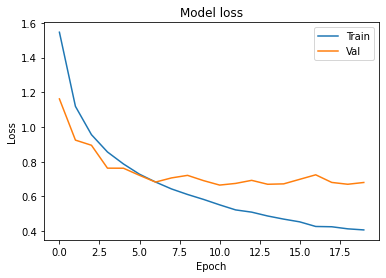

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

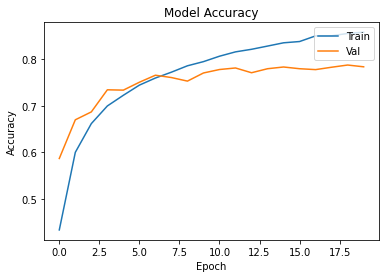

In [29]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [30]:
model.evaluate(xtest,ytestonehot)

313/313 [==============================] - 2s 6ms/step - loss: 0.6897 - accuracy: 0.7780


[0.6897390484809875, 0.777999997138977]

In [31]:
model.save('1cifar10_model.h5') #model will be saved in a file format called HDF5

In [51]:
model2 = Sequential()
model2.add(
    Conv2D(
        32,                   #Depth
        (3,3),                #Filter width, height
        activation='relu',    #activation
        padding='same',       #zero padding
        input_shape=(32,32,3))
)
#Second Layer:: No input required
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#Third Layer
model2.add(
    MaxPooling2D(pool_size=(2,2))
)
#Fourth layer:: Dropout with probability 0.25
model2.add(Dropout(0.25))
#Next Four Layers
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
# Nineth layer:: FC:: Prerequisite
# Our neurons are spatially arranged in a cube-like format rather than in just one row. 
# To make this cube-like format of neurons into one row, we have to first flatten it
model2.add(Flatten())
#Nineth Layer:: FC
model2.add(Sequential(Dense(512, activation='relu')))
#Tenth Layer:: DropOut
model2.add(Dropout(0.5))
#Eleventh + Twevelth Layer:: FC + Softmax
model2.add(Dense(10, activation="softmax"))






model2.compile(
    loss = "categorical_crossentropy", #Used mainly for classification problems
    optimizer = "adam",  #Adam is simply a type of stochastic gradient descent
    metrics = ['accuracy']
)




hist2 = model2.fit(xtrain, ytrainonehot, 
           batch_size=32, epochs=10, #Number of passess entire training dataset has been completed
           validation_split= 0.2)

Epoch 1/10
1250/1250 [==============================] - 22s 17ms/step - loss: 1.5476 - accuracy: 0.4353 - val_loss: 1.1557 - val_accuracy: 0.5880
Epoch 2/10
1250/1250 [==============================] - 20s 16ms/step - loss: 1.1291 - accuracy: 0.5985 - val_loss: 0.9773 - val_accuracy: 0.6503
Epoch 3/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.9686 - accuracy: 0.6579 - val_loss: 0.8840 - val_accuracy: 0.6858
Epoch 4/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.8719 - accuracy: 0.6934 - val_loss: 0.7988 - val_accuracy: 0.7197
Epoch 5/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.7957 - accuracy: 0.7222 - val_loss: 0.7637 - val_accuracy: 0.7340
Epoch 6/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.7388 - accuracy: 0.7411 - val_loss: 0.7527 - val_accuracy: 0.7359
Epoch 7/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.6910 - accuracy: 0.7562 - val_loss: 0.7271 -

In [72]:
model2.evaluate(xtest,ytestonehot)

313/313 [==============================] - 2s 6ms/step - loss: 0.6897 - accuracy: 0.7674


[0.6897116303443909, 0.7674000263214111]

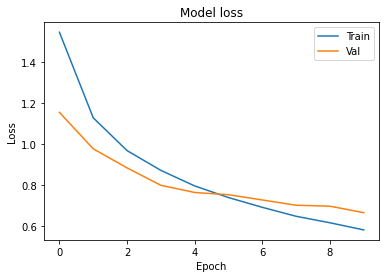

In [73]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

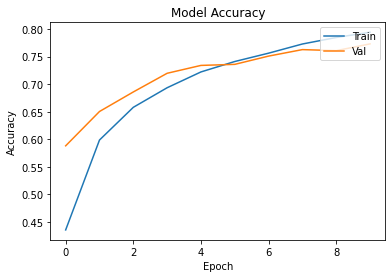

In [74]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

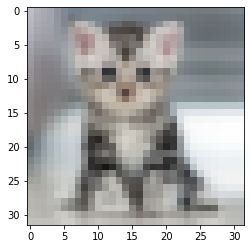

In [75]:
my_image = plt.imread("/content/cat.png")
from skimage.transform import resize
resized = resize(my_image,(32,32,3))
image = plt.imshow(resized)

In [76]:
import numpy as np

In [77]:
probabilities = model.predict(
    np.array([resized, ])
    )
#model.predict expects a 4-D array instead of a 3-D array
#np.array(...) code is there to change our current array of my_image_resized into a 4-D array 
#before applying the model.predict function.

In [78]:
probabilities

array([[0.02030825, 0.00180207, 0.00274953, 0.5945772 , 0.04064691,
        0.06330916, 0.01720748, 0.21726166, 0.01481535, 0.02732233]],
      dtype=float32)

In [79]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: cat -- Probability: 0.5945772
Second most likely class: horse -- Probability: 0.21726166
Third most likely class: dog -- Probability: 0.06330916
Fourth most likely class: deer -- Probability: 0.040646907
Fifth most likely class: truck -- Probability: 0.027322328


In [85]:
probabilities2 = model2.predict(
    np.array([resized, ])
    )
probabilities2

array([[5.3403061e-04, 1.1388100e-04, 6.3860500e-03, 2.3458794e-01,
        1.9892299e-01, 4.0009025e-01, 2.1736661e-02, 1.3656318e-01,
        4.6083113e-04, 6.0418126e-04]], dtype=float32)

In [81]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities2[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities2[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities2[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities2[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities2[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities2[0,index[5]])

Most likely class: dog -- Probability: 0.40009025
Second most likely class: cat -- Probability: 0.23458794
Third most likely class: deer -- Probability: 0.19892299
Fourth most likely class: horse -- Probability: 0.13656318
Fifth most likely class: frog -- Probability: 0.021736661


In [83]:
from keras.models import load_model
model3 = load_model('/content/my_cifar10_model.h5')

In [84]:
model3.evaluate(xtest,ytestonehot)

313/313 [==============================] - 2s 6ms/step - loss: 0.7219 - accuracy: 0.7709


[0.7218727469444275, 0.7709000110626221]

In [87]:
probabilities3 = model.predict(
    np.array([resized, ])
    )

In [88]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities3[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities3[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities3[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities3[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities3[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities3[0,index[5]])

Most likely class: cat -- Probability: 0.5945772
Second most likely class: horse -- Probability: 0.21726166
Third most likely class: dog -- Probability: 0.06330916
Fourth most likely class: deer -- Probability: 0.040646907
Fifth most likely class: truck -- Probability: 0.027322328
